<a href="https://colab.research.google.com/github/rajprakrit/ML-Library-1/blob/master/K_Means_Clustering_ML_Lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import style

In [0]:
class K_Means: 
    def __init__(self, k=2, tol=0.001, max_iter=300):  #default value of parameters are defined.

        '''Class parameters are no.of clusters, tolerence value i.e if change in centroid position is less 
          than the tolerence value, we break our operations. Number of iterations are also considered so 
          that we could reach a optiaml solution '''

        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        '''In fit method, we first decide our initial centroids. Then the inputs are assigned to their corresponding neaarest centroid.
          after per iteration, we make clusters and take the mean of every inut in it and assign it as the neew centroid. This precess
          is repeated upto some number of iterations so that we could acheive that particualar centroid'''

        self.centroids = {} #creating a dictionary so that we can push a particular value to its corresponding key( we basically create a map of numerous keys.)

        for i in range(self.k):
            self.centroids[i] = data[i] #randomly assigning cetroids.

        for i in range(self.max_iter):
            self.classifications = {} # creating dictionary for classification.

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                '''Euclidian distance is taken between every point and current cntroids and dictionary of classifications is updated
                  i.e a particular feature is assinged to nearest centroid.''' 
                distances = [ np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids ] 
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications: #centroids are updated.
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                ''' this method is created to consider the difference in position of centroid after each iterations.
                    If this distance is less than some threshold value the we stop our fitting as ve reached optimal
                    situation'''

                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:#this stement runs if our model is optimized.
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [0]:
dataset = pd.read_csv('iris.csv')
x = dataset.iloc[:, [1, 2]].values

In [0]:
x

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.6, 1.4],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5],
       [3.1,

In [0]:
clf = K_Means()
clf.fit(x)

78.83720930232566
200.24032042723644
16.31907654634925


In [0]:
style.use('ggplot')
colors = 10*["g","r","c","b","k"]

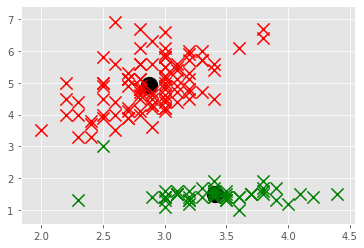

In [0]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

In [0]:
from sklearn import datasets

In [0]:
mnist = datasets.load_digits()

In [0]:
X, y = mnist.data, mnist.target

In [0]:
def train_test_split(X, y, ratio): #creating a method for train test split of our dataset
  
        size = X.shape[0];
        count = size*(1-ratio)
        count = int(count)
        X_train = X[:count]
        y_train = y[:count]
        X_test = X[count:]
        y_test = y[count:]

        return X_train, X_test, y_train, y_test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)

In [0]:
clusterClf = K_Means(k = 10)

In [12]:
clusterClf.fit(X_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
